# 매출, 매출 원가 및 매출 총이익

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 엑셀 파일 불러오기
file_path = '2019.xlsx'
xls = pd.ExcelFile(file_path)
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()


# 데이터 클렌징: 공백 처리 및 컬럼 이름 정리
df = pd.read_excel(file_path, sheet_name='Worksheet')
df.columns = df.columns.str.strip()  # 컬럼 이름의 공백 제거
df_cleaned = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # 데이터의 공백 제거

# 콤마(,) 제거 후 숫자 데이터로 변환
df_cleaned = df_cleaned.replace({',': ''}, regex=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

# 회사의 매출, 매출 원가 및 매출 총이익 분석 함수
def analyze_company_financials(company_name):
    # 회사 이름이 있는 열에서 해당 회사 필터링
    company_data = df_cleaned[df_cleaned.iloc[:, 2].str.contains(company_name, na=False)]
    
    if company_data.empty:
        return f"{company_name}에 해당하는 데이터를 찾을 수 없습니다."
    
    # 해당 회사의 매출, 매출 원가, 매출 총이익 항목 가져오기
    revenue_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_Revenue', na=False)]
    cost_of_sales_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_CostOfSales', na=False)]
    
    if revenue_row.empty or cost_of_sales_row.empty:
        return f"{company_name}의 매출 또는 매출 원가 데이터를 찾을 수 없습니다."
    
    # 매출 및 매출 원가 데이터 추출
    revenue_data = revenue_row.iloc[0, 11:].astype(float)
    cost_of_sales_data = cost_of_sales_row.iloc[0, 11:].astype(float)
    
    # 매출 총이익(Gross Profit) 계산
    gross_profit = revenue_data - cost_of_sales_data
    
    # 시각화: 매출, 매출 원가, 매출 총이익의 변화를 시각화
    plt.figure(figsize=(10, 6))

    # 매출, 매출 원가, 매출 총이익 라인 그래프 그리기
    plt.plot(revenue_data, label='Revenue', marker='o')
    plt.plot(cost_of_sales_data, label='Cost of Sales', marker='o')
    plt.plot(gross_profit, label='Gross Profit', marker='o')
    plt.rc('font', family=font_name)

    plt.title(f'{company_name}')
    plt.xlabel('기간')
    plt.ylabel('금액 (KRW)')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# 예시로 특정 회사 이름을 입력하여 분석을 시도
analyze_company_financials("BYC") 


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\System\\Library\\Fonts\\Helvetica.ttc'

# 수익성 분석

/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


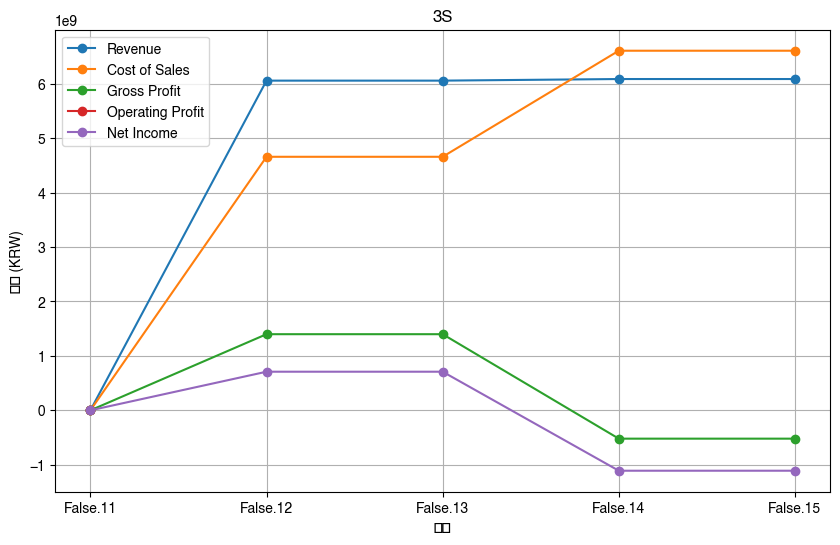

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/gimdonghun/Downloads/2019_1분기보고서_03_포괄손익계산서_20230120.xlsx'
xls = pd.ExcelFile(file_path)

# 데이터 클렌징: 공백 처리 및 컬럼 이름 정리
df = pd.read_excel(file_path, sheet_name='Worksheet')
df.columns = df.columns.str.strip()  # 컬럼 이름의 공백 제거
df_cleaned = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # 데이터의 공백 제거

# 콤마(,) 제거 후 숫자 데이터로 변환
df_cleaned = df_cleaned.replace({',': ''}, regex=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

# 특정 회사의 수익성 분석을 위한 함수
def analyze_company_profitability(company_name):
    # 회사 이름이 있는 열에서 해당 회사 필터링
    company_data = df_cleaned[df_cleaned.iloc[:, 2].str.contains(company_name, na=False)]
    
    if company_data.empty:
        return f"{company_name}에 해당하는 데이터를 찾을 수 없습니다."
    
    # 매출, 매출 원가, 판관비 등 주요 항목 가져오기
    revenue_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_Revenue', na=False)]
    cost_of_sales_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_CostOfSales', na=False)]
    sga_row = company_data[company_data.iloc[:, 10].str.contains('dart_TotalSellingGeneralAdministrativeExpenses', na=False)]  # 판관비
    net_income_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_ProfitLoss', na=False)]  # 순이익

    if revenue_row.empty or cost_of_sales_row.empty or sga_row.empty or net_income_row.empty:
        return f"{company_name}의 수익성 분석에 필요한 데이터를 찾을 수 없습니다."

    # 매출, 매출 원가, 판관비 및 순이익 데이터 추출
    revenue_data = revenue_row.iloc[0, 11:].astype(float)
    cost_of_sales_data = cost_of_sales_row.iloc[0, 11:].astype(float)
    sga_data = sga_row.iloc[0, 11:].astype(float)
    net_income_data = net_income_row.iloc[0, 11:].astype(float)

    # 매출 총이익(Gross Profit), 영업이익(Operating Profit) 계산
    gross_profit = revenue_data - cost_of_sales_data
    operating_profit = gross_profit - sga_data

    # 시각화: 수익성 분석 결과를 시각화
    plt.figure(figsize=(10, 6))

    # 매출, 매출 원가, 매출 총이익, 영업이익, 순이익 그래프 그리기
    plt.plot(revenue_data, label='Revenue', marker='o')
    plt.plot(cost_of_sales_data, label='Cost of Sales', marker='o')
    plt.plot(gross_profit, label='Gross Profit', marker='o')
    plt.plot(operating_profit, label='Operating Profit', marker='o')
    plt.plot(net_income_data, label='Net Income', marker='o')

    plt.title(f'{company_name}')
    plt.xlabel('기간')
    plt.ylabel('금액 (KRW)')
    plt.legend()
    plt.grid(True)

    plt.show()

# 예시로 특정 회사 이름을 입력하여 분석을 시도
analyze_company_profitability("3S") 


# 기간별 성과 분석

/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL

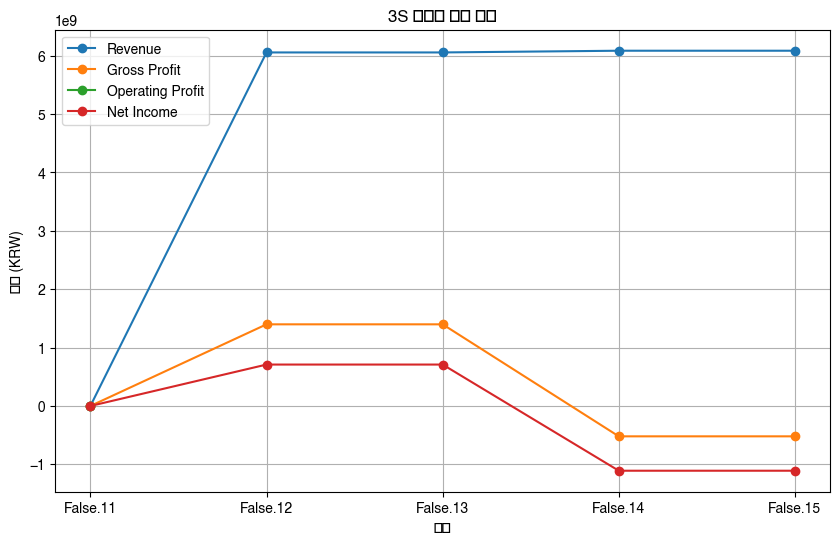

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/gimdonghun/Downloads/2019_1분기보고서_03_포괄손익계산서_20230120.xlsx'
xls = pd.ExcelFile(file_path)

# 데이터 클렌징: 공백 처리 및 컬럼 이름 정리
df = pd.read_excel(file_path, sheet_name='Worksheet')
df.columns = df.columns.str.strip()  # 컬럼 이름의 공백 제거
df_cleaned = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # 데이터의 공백 제거

# 콤마(,) 제거 후 숫자 데이터로 변환
df_cleaned = df_cleaned.replace({',': ''}, regex=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

# 특정 회사의 기간별 성과 분석을 위한 함수
def analyze_company_performance(company_name):
    # 회사 이름이 있는 열에서 해당 회사 필터링
    company_data = df_cleaned[df_cleaned.iloc[:, 2].str.contains(company_name, na=False)]
    
    if company_data.empty:
        return f"{company_name}에 해당하는 데이터를 찾을 수 없습니다."
    
    # 매출, 매출 원가, 판관비, 순이익 등의 주요 항목 가져오기
    revenue_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_Revenue', na=False)]
    cost_of_sales_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_CostOfSales', na=False)]
    sga_row = company_data[company_data.iloc[:, 10].str.contains('dart_TotalSellingGeneralAdministrativeExpenses', na=False)]  # 판관비
    net_income_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_ProfitLoss', na=False)]  # 순이익

    if revenue_row.empty or cost_of_sales_row.empty or sga_row.empty or net_income_row.empty:
        return f"{company_name}의 성과 분석에 필요한 데이터를 찾을 수 없습니다."

    # 매출, 매출 원가, 판관비 및 순이익 데이터 추출
    revenue_data = revenue_row.iloc[0, 11:].astype(float)
    cost_of_sales_data = cost_of_sales_row.iloc[0, 11:].astype(float)
    sga_data = sga_row.iloc[0, 11:].astype(float)
    net_income_data = net_income_row.iloc[0, 11:].astype(float)

    # 매출 총이익(Gross Profit), 영업이익(Operating Profit) 계산
    gross_profit = revenue_data - cost_of_sales_data
    operating_profit = gross_profit - sga_data

    # 시각화: 기간별 성과 분석 결과를 시각화
    plt.figure(figsize=(10, 6))

    # 매출, 매출 총이익, 영업이익, 순이익의 기간별 성과 그래프 그리기
    plt.plot(revenue_data, label='Revenue', marker='o')
    plt.plot(gross_profit, label='Gross Profit', marker='o')
    plt.plot(operating_profit, label='Operating Profit', marker='o')
    plt.plot(net_income_data, label='Net Income', marker='o')

    plt.title(f'{company_name} 기간별 성과 분석')
    plt.xlabel('기간')
    plt.ylabel('금액 (KRW)')
    plt.legend()
    plt.grid(True)

    plt.show()

# 예시로 특정 회사 이름을 입력하여 분석을 시도
analyze_company_performance("3S")

# 재무 비율 관리 분석

/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gimdonghun/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


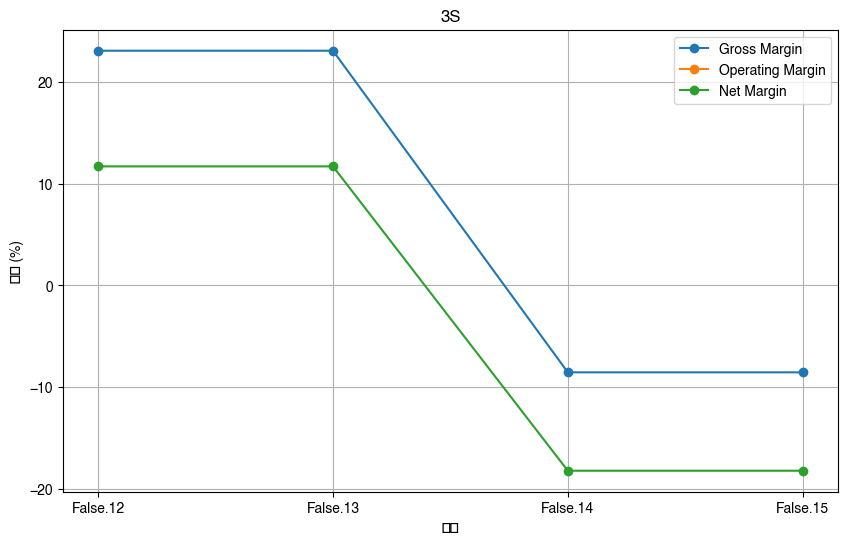

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/gimdonghun/Downloads/2019_1분기보고서_03_포괄손익계산서_20230120.xlsx'
xls = pd.ExcelFile(file_path)

# 데이터 클렌징: 공백 처리 및 컬럼 이름 정리
df = pd.read_excel(file_path, sheet_name='Worksheet')
df.columns = df.columns.str.strip()  # 컬럼 이름의 공백 제거
df_cleaned = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # 데이터의 공백 제거

# 콤마(,) 제거 후 숫자 데이터로 변환
df_cleaned = df_cleaned.replace({',': ''}, regex=True)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

# 특정 회사의 재무 비율 관리를 위한 함수
def analyze_company_financial_ratios(company_name):
    # 회사 이름이 있는 열에서 해당 회사 필터링
    company_data = df_cleaned[df_cleaned.iloc[:, 2].str.contains(company_name, na=False)]
    
    if company_data.empty:
        return f"{company_name}에 해당하는 데이터를 찾을 수 없습니다."
    
    # 매출, 매출 원가, 판관비, 순이익 등의 주요 항목 가져오기
    revenue_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_Revenue', na=False)]
    cost_of_sales_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_CostOfSales', na=False)]
    sga_row = company_data[company_data.iloc[:, 10].str.contains('dart_TotalSellingGeneralAdministrativeExpenses', na=False)]  # 판관비
    net_income_row = company_data[company_data.iloc[:, 10].str.contains('ifrs_ProfitLoss', na=False)]  # 순이익

    if revenue_row.empty or cost_of_sales_row.empty or sga_row.empty or net_income_row.empty:
        return f"{company_name}의 재무 비율 분석에 필요한 데이터를 찾을 수 없습니다."

    # 매출, 매출 원가, 판관비 및 순이익 데이터 추출
    revenue_data = revenue_row.iloc[0, 11:].astype(float)
    cost_of_sales_data = cost_of_sales_row.iloc[0, 11:].astype(float)
    sga_data = sga_row.iloc[0, 11:].astype(float)
    net_income_data = net_income_row.iloc[0, 11:].astype(float)

    # 매출 총이익(Gross Profit), 영업이익(Operating Profit) 계산
    gross_profit = revenue_data - cost_of_sales_data
    operating_profit = gross_profit - sga_data

    # 재무 비율 계산
    gross_margin = (gross_profit / revenue_data) * 100  # 매출 총이익률
    operating_margin = (operating_profit / revenue_data) * 100  # 영업이익률
    net_margin = (net_income_data / revenue_data) * 100  # 순이익률

    # 시각화: 재무 비율 결과를 시각화
    plt.figure(figsize=(10, 6))

    # 매출 총이익률, 영업이익률, 순이익률 그래프 그리기
    plt.plot(gross_margin, label='Gross Margin', marker='o')
    plt.plot(operating_margin, label='Operating Margin', marker='o')
    plt.plot(net_margin, label='Net Margin', marker='o')

    plt.title(f'{company_name}')
    plt.xlabel('기간')
    plt.ylabel('비율 (%)')
    plt.legend()
    plt.grid(True)

    plt.show()

# 예시로 특정 회사 이름을 입력하여 분석을 시도
analyze_company_financial_ratios("3S")